In [1]:
import math
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

#Datos que conocemos
epsilon = math.radians(23 + 27/60)
lat = math.radians(28 + 18/60 + 4/3600)
lon_observatorio = (-16 - 30/60 - 38/3600)/15

ar_arp273 = 2 + 21/60 + 28.7063465592/3600
dec_arp273 = math.radians(39 + 22/60 + 32.121363216/3600)

In [2]:
#Para quitar las horas de Sol y a las de ARP273 sobre el horizonte, según los casos posibles para ambos intervalos de tiempo.
#Devolvemos una lista con el intervalo (o intervalos) de visibilidad.
def quitarHorasSol(torto_sol, tocaso_sol, torto_arp273, tocaso_arp273):
    #Puede darse el caso que desde que se dé el orto hasta el ocaso de ARP273 pasemos de un día al siguiente 
    #(en ese caso partimos en dos el intervalo a las 0h).
    #Esto hay que tenerlo en cuenta ya que los casos son distinos en función de si se cambia de día o no.
    if torto_arp273 < tocaso_arp273:
        if (torto_arp273 <= torto_sol and tocaso_arp273 <= torto_sol) or (torto_arp273 >= tocaso_sol and tocaso_arp273 >= tocaso_sol):
            interval = [(torto_arp273, tocaso_arp273)]
        elif torto_arp273 <= torto_sol and tocaso_arp273 >= torto_sol and tocaso_arp273 <= tocaso_sol:
            interval = [(torto_arp273, torto_sol)]
        elif torto_arp273 >= torto_sol and torto_arp273 <= tocaso_sol and tocaso_arp273 >= tocaso_sol:
            interval = [(tocaso_sol, tocaso_arp273)]
        else:
            interval = [(torto_arp273, torto_sol),(tocaso_sol, tocaso_arp273)]
    else:
        if torto_arp273 >= tocaso_sol and tocaso_arp273 <= torto_sol:
            interval = [(0, tocaso_273),(torto_arp273, 0)]
        elif tocaso_arp273 <= torto_sol and torto_sol <= torto_arp273 and torto_arp273 <= tocaso_sol:
            interval = [(0,tocaso_arp273),(tocaso_sol, 0)]
        elif torto_arp273 >= tocaso_sol and torto_sol <= tocaso_arp273 and tocaso_arp273 <= tocaso_sol:
            interval = [(0, torto_sol),(torto_arp273, 0)]
        elif torto_sol <= tocaso_arp273 and torto_arp273 <= tocaso_sol:
            interval = [(0, torto_sol), (tocaso_sol, 0)]
        elif torto_arp273 >= tocaso_sol and tocaso_arp273 >= tocaso_sol:
            interval = [(0, torto_sol),(tocaso_sol, tocaso_arp273),(torto_arp273, 0)]
        else:
            interval = [(0, tocaso_arp273), (torto_arp273, torto_sol), (tocaso_sol, 0)]
    
    return interval

#Pasar de horas a horas, minutos y segundos
def convertirHoras(horas):
    mins, hrs = math.modf(horas)
    mins *= 60
    secs, mins = math.modf(mins)
    secs *= 60
    return int(hrs),int(mins),secs

#Para imprimir en texto las horas de visibilidad para cada día
def printDias(interval_list):
    s = "Intervalos de visibilidad por día del año:\n===========================================\n"
    aux_m = '0'
    iterator = 0
    for m in range(1,13):
        if m >= 10:
            aux_m = ""
        if (m<8 and m%2!=0) or (m>=8 and m%2==0):
            dias_mes = 31
        elif m == 2:
            dias_mes = 28
        else:
            dias_mes = 30
    
        #Para formato de cifras menores que 10 (escribir 01 en lugar de 1)
        aux_d = '0'
        for i in range(1,dias_mes+1):
            if i>=10:
                aux_d = ""
            s += "Dia " + aux_d + str(i) + '-' + aux_m + str(m) + ':\n'
            for interval in interval_list[iterator]:
                hrs1, mins1, secs1 = convertirHoras(interval[0])
                hrs2, mins2, secs2 = convertirHoras(interval[1])
                s += '(' +  str(hrs1) + "h " + str(mins1) + "m " + str(secs1) + "s, "
                s += str(hrs2) + "h " + str(mins2) + "m " + str(secs2) + "s)\n"
            s += "\n"
            iterator += 1
        s += "-----------------------------------------------------\n"
            
    print(s)

#Calcular las horas de visibilidad de ARP273 para cada día del año
def visibility_hours():
    interval_list = []
    #Recordar que empezamos en el 21 de marzo
    for i in range(365):
        #Cálculos relativos al Sol
        lon = i*360/365.25
        if lon <= 90 or lon >= 270:
            lon = math.radians(lon)
            dec_sol = math.asin(math.sin(epsilon)*math.cos(math.pi/2-lon))
        elif lon > 90 and lon < 270:
            lon = math.radians(lon)
            dec_sol = math.asin(math.sin(epsilon)*math.cos(lon-math.pi/2))
        
        ar_sol = math.asin(math.tan(dec_sol)/math.tan(epsilon))
        H_sol = math.acos(-math.tan(dec_sol)*math.tan(lat))
        H_sol = math.degrees(H_sol)/15
        if H_sol <= 12:
            Hocaso_sol = H_sol
            Horto_sol = 24 - H_sol
        else:
            Horto_sol = H_sol
            Hocaso_sol = 24 - H_sol
            
        if Hocaso_sol < 0:
            Hocaso_sol += 24
        elif Hocaso_sol >= 24:
            Hocaso_sol -= 24
        if Horto_sol < 0:
            Horto_sol += 24
        elif Horto_sol >= 24:
            Horto_sol -= 24
        
        #Cálculos relativos a ARP273
        H_arp273 = math.acos(-math.tan(dec_arp273)*math.tan(lat))
        H_arp273 = math.degrees(H_arp273)/15
        if H_arp273 <= 12:
            Hocaso_arp273 = H_arp273
            Horto_arp273 = 24 - H_arp273
        else:
            Horto_arp273 = H_arp273
            Hocaso_arp273 = 24 - H_arp273
            
        tsid_ocaso = ar_arp273 + Hocaso_arp273
        tsid_orto = ar_arp273 + Horto_arp273
        
        if tsid_ocaso >= 24:
            tsid_ocaso -= 24
        if tsid_orto >= 24:
            tsid_orto -= 24
        
        #Calculamos el intervalo de tiempo (en UT) en el que el Sol está sobre el horizonte
        tocaso_sol = Hocaso_sol + 12 - lon_observatorio 
        torto_sol = Horto_sol + 12 - lon_observatorio 
        if tocaso_sol >= 24:
            tocaso_sol -= 24
        if torto_sol >= 24:
            torto_sol -= 24
        
        #Calculamos el intervalo de tiempo (en UT) en el que ARP273 está sobre el horizonte
        #Primero necesitamos el angulo horario del Sol en esos instantes
        ar_sol = math.degrees(ar_sol)/15
        Hocaso_solarp = tsid_ocaso - ar_sol
        if Hocaso_solarp < 0:
            Hocaso_solarp += 24 
        Horto_solarp = tsid_orto - ar_sol
        if Horto_solarp < 0:
            Horto_solarp += 24 
            
        tocaso_arp273 = Hocaso_solarp + 12 - lon_observatorio 
        torto_arp273 = Horto_solarp + 12 - lon_observatorio
        if tocaso_arp273 >= 24:
            tocaso_arp273 -= 24
        if torto_arp273 >= 24:
            torto_arp273 -= 24
        
        #Quitamos las horas de Sol
        if torto_arp273 < tocaso_arp273 and torto_sol <= torto_arp273 and tocaso_arp273 <= tocaso_sol:
            visible = False
        else:
            visible = True
            interval = quitarHorasSol(torto_sol, tocaso_sol, torto_arp273, tocaso_arp273)
        
        if visible:
            interval_list.append(interval)
        else:
            interval_list.append(None)        
    
    #Como empezamos los cálculos en el 21 de marzo, reordenamos la lista para que comience el 1 de enero.
    interval_list1 = interval_list[:286]
    interval_list2 = interval_list[286:]
    interval_list = interval_list2 + interval_list1
    
    return interval_list

#Dibuja una gráfica que representa las horas de visibilidad a lo largo del año.
def graficaIntervalos(intervalos):
    x = pd.date_range(start='01/01/2023', end='31/12/2024')
    y = intervalos

    #Pintamos todos los puntos
    for xe, ye in zip(x, y):
        for e in ye:
            e0 = e[0]
            if(e[1]==0):
                e1 = 24
            else:
                e1 = e[1]          
            
            plt.scatter([xe], e0, c='orangered', s=2) 
            plt.scatter([xe], e1, c='orangered',s=2)
            plt.fill_between([xe], e0, e1, color='orangered')
            
    plt.ylim(0, 24)
    plt.title("Intervalo de visibilidad a lo largo del año.")
    plt.show()

Intervalos de visibilidad por día del año:
Dia 01-01:
(0h 0m 0.0s, 4h 20m 43.599495429195656s)
(18h 13m 24.33534092057215s, 0h 0m 0.0s)

Dia 02-01:
(0h 0m 0.0s, 4h 16m 27.965700654953594s)
(18h 13m 38.60399469867815s, 0h 0m 0.0s)

Dia 03-01:
(0h 0m 0.0s, 4h 12m 12.687755389700612s)
(18h 13m 53.95260185016866s, 0h 0m 0.0s)

Dia 04-01:
(0h 0m 0.0s, 4h 7m 57.789730354750475s)
(18h 14m 10.368855874150142s, 0h 0m 0.0s)

Dia 05-01:
(0h 0m 0.0s, 4h 3m 43.29502955509639s)
(18h 14m 27.8397277313735s, 0h 0m 0.0s)

Dia 06-01:
(0h 0m 0.0s, 3h 59m 29.22635466252558s)
(18h 14m 46.351501562772626s, 0h 0m 0.0s)

Dia 07-01:
(0h 0m 0.0s, 3h 55m 15.605671566753188s)
(18h 15m 5.889811680776802s, 0h 0m 0.0s)

Dia 08-01:
(0h 0m 0.0s, 3h 51m 2.4541791585116357s)
(18h 15m 26.439680640066854s, 0h 0m 0.0s)

Dia 09-01:
(0h 0m 0.0s, 3h 46m 49.79228039639395s)
(18h 15m 47.98555819367749s, 0h 0m 0.0s)

Dia 10-01:
(0h 0m 0.0s, 3h 42m 37.6395556972912s)
(18h 16m 10.511360940706425s, 0h 0m 0.0s)

Dia 11-01:
(0h 0m 0.0

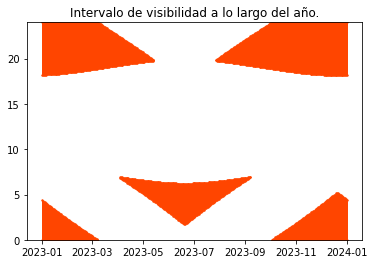

In [3]:
intervaloVisibilidad = visibility_hours()
printDias(intervaloVisibilidad)
graficaIntervalos(intervaloVisibilidad)